In [51]:
import pandas as pd
import numpy as np
import skrf as rf
import matplotlib.pyplot as plt
import math
import os
from numpy.linalg import multi_dot

In [52]:
def parse_s2p(file):
    data_s2p = pd.read_table(file, sep=" ", header=None,  names=["Frequency ", "S11 real", "S11 imaginary", "S12 real", "S12 imaginary",  "S21 real", "S21 imaginary",  "S22 real", "S22 imaginary" ])
    data_s2p.drop(data_s2p.head(3).index,inplace=True)
    return data_s2p

In [53]:
mdf_file_path ='C:/Users/Dell/Desktop/EE work/s2p/SEI_VGQM5VDQ050_T25_s2p/SEI_VGQM5VDQ050_T25.mdf'
dir_name = os.path.dirname(mdf_file_path)

data_file_mdf = pd.read_csv(mdf_file_path, sep=" ", header=None,  names=[" ", "FILENAME(string)", "Temp_C(real)", "Vd(real)","Id(real)", "Vg(real)" ])
data_file_mdf.drop(data_file_mdf.head(2).index,inplace=True)
data_file_mdf.drop(data_file_mdf.tail(1).index,inplace=True)
data_file_mdf

,,FILENAME(string),Temp_C(real),Vd(real),Id(real),Vg(real)
2,1,FOLDER\AA1.s2p,25,+5.61562E-02,-1.58459E-04,-5.00071E+00
3,2,FOLDER\AA2.s2p,25,+4.92744E-01,-2.04479E-04,-4.99913E+00
4,3,FOLDER\AA3.s2p,25,+1.00714E+00,-1.72999E-04,-5.00088E+00
5,4,FOLDER\AA4.s2p,25,+1.50498E+00,-1.65738E-04,-4.99965E+00
6,5,FOLDER\AA5.s2p,25,+2.03171E+00,-9.55084E-05,-5.00053E+00
...,...,...,...,...,...,...
1608,1607,FOLDER\GW5.s2p,25,+1.02690E+01,+8.81087E-01,+1.99870E+00
1609,1608,FOLDER\GW6.s2p,25,+1.12627E+01,+8.93233E-01,+2.00010E+00
1610,1609,FOLDER\GW7.s2p,25,+1.22549E+01,+9.03618E-01,+2.00003E+00
1611,1610,FOLDER\GW8.s2p,25,+1.32358E+01,+9.12492E-01,+1.99973E+00


In [54]:
tabledata = np.asarray(data_file_mdf)

for rows in range(tabledata.shape[0]):
    tabledata[rows][1] = os.path.split(tabledata[rows][1] .replace("\\","/"))[1]
# tabledata
tabledata[:, 0] = tabledata[:, 0].astype('int64')
tabledata

array([[1, 'AA1.s2p', '25', '+5.61562E-02', '-1.58459E-04',
        '-5.00071E+00'],
       [2, 'AA2.s2p', '25', '+4.92744E-01', '-2.04479E-04',
        '-4.99913E+00'],
       [3, 'AA3.s2p', '25', '+1.00714E+00', '-1.72999E-04',
        '-5.00088E+00'],
       ...,
       [1609, 'GW7.s2p', '25', '+1.22549E+01', '+9.03618E-01',
        '+2.00003E+00'],
       [1610, 'GW8.s2p', '25', '+1.32358E+01', '+9.12492E-01',
        '+1.99973E+00'],
       [1611, 'GW9.s2p', '25', '+1.42393E+01', '+9.20569E-01',
        '+2.00023E+00']], dtype=object)

In [55]:
# file_numbers = [1, 54, 107, 213, 266, 319, 425, 1531, 1482, 1405, 1323, 1264, 1201, 1061, 979, 743, 478, 372]
file_numbers = [21, 74, 127, 180, 233, 286, 339, 392, 445, 498, 551, 604, 657, 711, 764, 816, 865] 
len(file_numbers)

17

In [56]:
file_names = []
vd_values = []
vg_values = []
files_dict = {}

for number in file_numbers:
    row = list(tabledata[:, 0]).index(number)
    file_names.append(tabledata[row][1])
    vd_values.append(tabledata[row][3])
    vg_values.append(tabledata[row][5])
#     files_dict[number] = [tabledata[row][1], tabledata[row][3], tabledata[row][5] ]

files_dict = {'point': file_numbers, 'name': file_names, 'vd': vd_values, 'vg': vg_values}

files_dataframe = pd.DataFrame(files_dict)#.items(), columns=['Number', 'File Names'])#, 'vd', 'vg'])

files_dataframe

,point,name,vd,vg
0,21,AC3.s2p,+1.00312E+01,-4.99895E+00
1,74,AI2.s2p,+1.00347E+01,-4.50026E+00
2,127,AO1.s2p,+1.00329E+01,-3.99946E+00
3,180,AT9.s2p,+1.00201E+01,-3.49918E+00
4,233,AZ8.s2p,+1.00209E+01,-3.40076E+00
5,286,BF7.s2p,+1.00383E+01,-3.30146E+00
6,339,BL6.s2p,+1.00350E+01,-3.20067E+00
7,392,BR5.s2p,+1.00357E+01,-3.09988E+00
8,445,BX4.s2p,+1.00354E+01,-3.00102E+00
9,498,CD3.s2p,+1.00238E+01,-2.89970E+00


In [57]:
def cgd_meas(de_embedded_y, freq):
    cgd_meas_values = []
    for y, f in zip(de_embedded_y, freq):
        w = 2 * (np.pi) * f
        val = -1 * (y[0][1].imag/ w)
        cgd_meas_values.append(val)
    return cgd_meas_values

def cgs_meas(de_embedded_y, freq):
    cgs_meas_values = []
    for y, f in zip(de_embedded_y, freq):
        w = 2 * (np.pi) * f
        val = (y[0][0].imag + y[0][1].imag) / w
        cgs_meas_values.append(val)
    return cgs_meas_values

def gm_meas(de_embedded_y, freq):
    gm_meas = []
    for y in de_embedded_y:
        gm_meas.append(np.absolute(y[1][0].real))
    
    return gm_meas

def cds_meas(de_embedded_y, freq):
    cds_meas_values = []
    for y, f in zip(de_embedded_y, freq):
        w = 2 * (np.pi) * f
        val = ((y[1][1].imag + y[0][1].imag)/ w)
        cds_meas_values.append(val)
    return cds_meas_values

def rds_model(de_embedded_y, freq):
    rds_model = []
    for y, f in zip(de_embedded_y, freq):
        val = 1 / (y[1][1].real + y[0][1].real)
        rds_model.append(val)
    return rds_model



In [58]:
cgd_dict = {}
cgs_dict = {}
gm_dict = {}
cds_meas_dict = {}
rds_model_dict = {}

In [59]:
manifold_in = 'Downloads/UnitCell_Manifold_in_wLauncher.s2p'
manifold_ntwk_in = rf.Network(manifold_in)
manifold_ntwk_in_t = manifold_ntwk_in.t

manifold_out = 'Downloads/UnitCell_Manifold_out_wLauncher.s2p'
manifold_ntwk_out = rf.Network(manifold_out)
manifold_ntwk_out_t = manifold_ntwk_out.t

In [60]:
############################################## Give the maximum frequency ################################################

In [61]:
base_frequency = 4e+08
max_frequency = 400e+08
step_size = 1e+08
steps = ((max_frequency - base_frequency) / step_size) + 1
steps

397.0

In [62]:
def matrix(lists, i):
    mat = np.zeros((2,2), dtype = "complex")
    mat[0][0], mat[0][1] = lists[i][0][0], lists[i][0][1]
    mat[1][0], mat[1][1] = lists[i][1][0], lists[i][1][1]    
    return mat

def mat_calculation(manifold_ntwk_in_t, s2p_file_t, manifold_ntwk_out_t):
    
    de_embedded_tb = []
    for i in range(len(s2p_file_t)):
        ta_inv = matrix(manifold_ntwk_in_t, i)
        t_total = matrix(s2p_file_t, i)
        tc_inv = matrix(manifold_ntwk_out_t, i)
        
        result_mat = multi_dot([ta_inv, t_total, tc_inv])
        
        de_embedded_tb.append(result_mat)

    return de_embedded_tb

In [63]:
################################################# De-embedding ######################################################

In [64]:
for names in file_names:
    f = os.path.join(dir_name, names)
    f = f.replace("\\","/")
    
    filename = os.path.split(f)[1]
    
    s2p_dataframe = parse_s2p(f)
    s2p_data_array = (np.asarray(s2p_dataframe)).astype('float32')
    freq = s2p_data_array[0:int(steps), 0]

    ntwk = rf.Network(f)
    s2p_file_t = ntwk.t

    de_embedded_tb = mat_calculation(np.linalg.inv(manifold_ntwk_in_t[0:int(steps)]), s2p_file_t[0:int(steps)], np.linalg.inv(manifold_ntwk_out_t[0:int(steps)]))

    de_embedded_tb = np.array(de_embedded_tb)
    de_embedded_s = rf.network.t2s(de_embedded_tb)
    de_embedded_y = rf.network.s2y(de_embedded_s, z0=50, s_def='power')
    
    cgd_dict[filename] = cgd_meas(de_embedded_y, freq)
    cgs_dict[filename] = cgs_meas(de_embedded_y, freq)
    gm_dict[filename] = gm_meas(de_embedded_y, freq)
    cds_meas_dict[filename] = cds_meas(de_embedded_y, freq)
    rds_model_dict[filename] = rds_model(de_embedded_y, freq)

In [65]:
################################################### cgd ########################################################

In [66]:
cgd_dataframe = pd.DataFrame(cgd_dict)
cgd_dataframe.insert(0, 'Frequency', freq)
cgd_dataframe_array = np.asarray(cgd_dataframe)
cgd_dataframe

,Frequency,AC3.s2p,AI2.s2p,AO1.s2p,AT9.s2p,AZ8.s2p,BF7.s2p,BL6.s2p,BR5.s2p,BX4.s2p,CD3.s2p,CJ2.s2p,CP1.s2p,CU9.s2p,DA9.s2p,DG8.s2p,DM6.s2p,DS1.s2p
0,4.000000e+08,1.229747e-13,1.209837e-13,1.262417e-13,1.304372e-13,1.364773e-13,1.393663e-13,1.339421e-13,1.327111e-13,1.353862e-13,1.339794e-13,1.329094e-13,1.388213e-13,1.375654e-13,1.181621e-13,1.066429e-13,1.097004e-13,1.233390e-13
1,5.000000e+08,1.181365e-13,1.225479e-13,1.208115e-13,1.314382e-13,1.334338e-13,1.299242e-13,1.370644e-13,1.377104e-13,1.444063e-13,1.415698e-13,1.393755e-13,1.372229e-13,1.347473e-13,1.123632e-13,1.121046e-13,1.064696e-13,1.146895e-13
2,6.000000e+08,1.197796e-13,1.214629e-13,1.273597e-13,1.328531e-13,1.305598e-13,1.311795e-13,1.379816e-13,1.388329e-13,1.389250e-13,1.387170e-13,1.396198e-13,1.401709e-13,1.370875e-13,1.132812e-13,1.116798e-13,1.117715e-13,1.107496e-13
3,7.000000e+08,1.172117e-13,1.194254e-13,1.251305e-13,1.298684e-13,1.332363e-13,1.332263e-13,1.375768e-13,1.380349e-13,1.392623e-13,1.390950e-13,1.389227e-13,1.343461e-13,1.354544e-13,1.136320e-13,1.127303e-13,1.144152e-13,1.124846e-13
4,8.000000e+08,1.170372e-13,1.208429e-13,1.217237e-13,1.290961e-13,1.332223e-13,1.328792e-13,1.381101e-13,1.372835e-13,1.383931e-13,1.391236e-13,1.384563e-13,1.333976e-13,1.356164e-13,1.108986e-13,1.116131e-13,1.103290e-13,1.124001e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.960000e+10,-2.566214e-13,-2.735832e-13,-2.236554e-13,-3.122716e-13,-2.731877e-13,-2.111757e-13,-1.732876e-13,-2.792731e-13,-2.638520e-13,-2.237424e-13,-2.000190e-13,-1.876323e-13,-2.114519e-13,-1.518579e-13,-1.619680e-13,-1.055723e-13,-8.449713e-14
393,3.970000e+10,-2.106604e-13,-2.634219e-13,-2.917492e-13,-2.702760e-13,-2.472441e-13,-2.099089e-13,-2.314883e-13,-2.355198e-13,-2.714343e-13,-2.423028e-13,-2.310077e-13,-1.908753e-13,-1.610711e-13,-1.520351e-13,-1.436602e-13,-1.633796e-13,-1.067627e-13
394,3.980000e+10,-2.404946e-13,-1.838604e-13,-2.524853e-13,-1.585190e-13,-2.134890e-13,-2.045649e-13,-1.526254e-13,-2.749795e-13,-1.731285e-13,-1.853718e-13,-1.960353e-13,-2.051195e-13,-1.002283e-13,-6.472346e-14,-1.399710e-13,-9.821910e-14,-1.210783e-13
395,3.990000e+10,-1.918359e-13,-2.849517e-13,-2.741782e-13,-2.025582e-13,-2.102368e-13,-2.006826e-13,-1.596187e-13,-2.077277e-13,-2.138326e-13,-1.970532e-13,-1.142152e-13,-1.201142e-13,-1.865901e-13,-2.158725e-13,-1.383258e-13,-1.007866e-13,-1.239321e-13


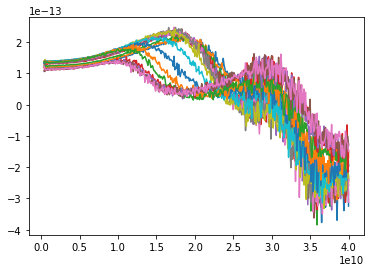

In [67]:
for i in range(17):
    plt.plot(cgd_dataframe_array[:,0], cgd_dataframe_array[:,(i + 1)])

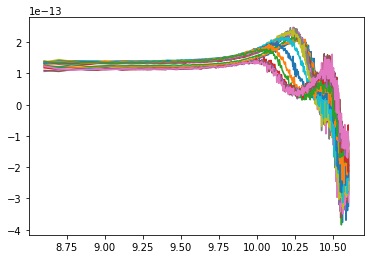

In [68]:
for i in range(17):
    plt.plot(np.log10(cgd_dataframe_array[:,0]), cgd_dataframe_array[:,(i + 1)])

In [69]:
################################################### cgs ########################################################

In [70]:
cgs_dataframe = pd.DataFrame(cgs_dict)
cgs_dataframe.insert(0, 'Frequency', freq)
cgs_dataframe_array = np.asarray(cgs_dataframe)
cgs_dataframe

,Frequency,AC3.s2p,AI2.s2p,AO1.s2p,AT9.s2p,AZ8.s2p,BF7.s2p,BL6.s2p,BR5.s2p,BX4.s2p,CD3.s2p,CJ2.s2p,CP1.s2p,CU9.s2p,DA9.s2p,DG8.s2p,DM6.s2p,DS1.s2p
0,4.000000e+08,6.482756e-13,6.717646e-13,6.882170e-13,7.085688e-13,7.159462e-13,7.230727e-13,7.410498e-13,7.453056e-13,8.094348e-13,9.682262e-13,1.196205e-12,1.383635e-12,1.545886e-12,1.663380e-12,1.858351e-12,1.907659e-12,1.784048e-12
1,5.000000e+08,6.623009e-13,6.743824e-13,7.016803e-13,7.164882e-13,7.228376e-13,7.336112e-13,7.367363e-13,7.444359e-13,8.013957e-13,9.572412e-13,1.178187e-12,1.386779e-12,1.562255e-12,1.710844e-12,1.809963e-12,1.939863e-12,1.894746e-12
2,6.000000e+08,6.585077e-13,6.763627e-13,6.911274e-13,7.192698e-13,7.242314e-13,7.317076e-13,7.329723e-13,7.480769e-13,8.112950e-13,9.588956e-13,1.170606e-12,1.373280e-12,1.549844e-12,1.709830e-12,1.807385e-12,1.871723e-12,1.939841e-12
3,7.000000e+08,6.571688e-13,6.779335e-13,6.932626e-13,7.159328e-13,7.216666e-13,7.305166e-13,7.342818e-13,7.491461e-13,8.079852e-13,9.580110e-13,1.176054e-12,1.400566e-12,1.559339e-12,1.711662e-12,1.793766e-12,1.848911e-12,1.924727e-12
4,8.000000e+08,6.581140e-13,6.753942e-13,6.972427e-13,7.182938e-13,7.197602e-13,7.270046e-13,7.331574e-13,7.478183e-13,8.038702e-13,9.579482e-13,1.176832e-12,1.406329e-12,1.557051e-12,1.718783e-12,1.808175e-12,1.897611e-12,1.915472e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.960000e+10,-2.404551e-13,-2.325742e-13,-2.845033e-13,-2.189344e-13,-2.190752e-13,-2.761598e-13,-3.050388e-13,-2.150166e-13,-2.351857e-13,-2.565060e-13,-2.533823e-13,-2.807907e-13,-2.829756e-13,-3.549332e-13,-3.575246e-13,-4.176854e-13,-4.252249e-13
393,3.970000e+10,-2.850721e-13,-2.154175e-13,-2.020334e-13,-2.129954e-13,-2.421800e-13,-2.753045e-13,-2.590814e-13,-2.422880e-13,-2.219054e-13,-2.310103e-13,-2.324226e-13,-2.747358e-13,-3.212073e-13,-3.531970e-13,-3.832870e-13,-3.715113e-13,-4.199409e-13
394,3.980000e+10,-2.684244e-13,-3.152133e-13,-2.508739e-13,-3.219927e-13,-2.715481e-13,-2.976723e-13,-3.160418e-13,-2.340043e-13,-3.089274e-13,-2.676762e-13,-2.700728e-13,-2.575414e-13,-3.809858e-13,-4.207861e-13,-3.729514e-13,-4.003832e-13,-4.238311e-13
395,3.990000e+10,-2.997830e-13,-2.302515e-13,-2.458098e-13,-2.819820e-13,-2.669923e-13,-2.996850e-13,-3.389256e-13,-2.667898e-13,-2.555095e-13,-2.805340e-13,-3.515097e-13,-3.581909e-13,-3.136401e-13,-3.003297e-13,-3.849651e-13,-4.095420e-13,-4.035026e-13


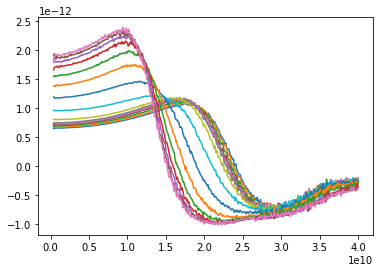

In [71]:
for i in range(17):
    plt.plot(cgs_dataframe_array[:,0], cgs_dataframe_array[:,(i + 1)])

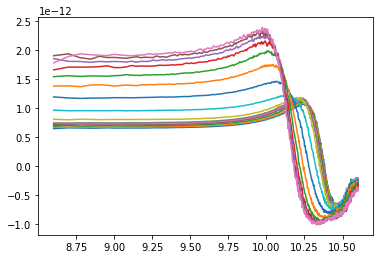

In [72]:
for i in range(17):
    plt.plot(np.log10(cgs_dataframe_array[:,0]), cgs_dataframe_array[:,(i + 1)])

In [73]:
################################################### gm ########################################################

In [74]:
gm_dataframe = pd.DataFrame(gm_dict)
gm_dataframe.insert(0, 'Frequency', freq)
gm_dataframe_array = np.asarray(gm_dataframe)
gm_dataframe

,Frequency,AC3.s2p,AI2.s2p,AO1.s2p,AT9.s2p,AZ8.s2p,BF7.s2p,BL6.s2p,BR5.s2p,BX4.s2p,CD3.s2p,CJ2.s2p,CP1.s2p,CU9.s2p,DA9.s2p,DG8.s2p,DM6.s2p,DS1.s2p
0,4.000000e+08,0.000026,5.725546e-07,0.000001,0.000007,4.615006e-06,1.656896e-05,0.000007,0.000065,0.001187,0.009040,0.033741,0.075582,0.122093,0.168397,0.202183,0.221005,0.236334
1,5.000000e+08,0.000012,1.895640e-05,0.000011,0.000002,3.462016e-06,5.247733e-07,0.000001,0.000082,0.001156,0.008955,0.033612,0.075662,0.122868,0.170333,0.200400,0.222174,0.237394
2,6.000000e+08,0.000002,7.634510e-06,0.000008,0.000018,1.833906e-05,1.327439e-06,0.000010,0.000057,0.001152,0.008801,0.033243,0.074860,0.121833,0.168696,0.200156,0.223234,0.237977
3,7.000000e+08,0.000012,1.044391e-05,0.000002,0.000009,5.634689e-07,1.947565e-06,0.000008,0.000065,0.001143,0.008807,0.033239,0.075189,0.122147,0.168612,0.201310,0.222039,0.237560
4,8.000000e+08,0.000006,9.693080e-06,0.000008,0.000003,8.280594e-06,9.365758e-07,0.000009,0.000065,0.001121,0.008746,0.033190,0.075442,0.122241,0.170652,0.201005,0.222484,0.238686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.960000e+10,0.023935,3.691604e-02,0.037365,0.045418,3.710404e-02,3.536020e-02,0.028694,0.036721,0.027387,0.023191,0.012372,0.008553,0.009262,0.007483,0.012957,0.011607,0.005610
393,3.970000e+10,0.044608,3.492371e-02,0.039149,0.024992,3.691669e-02,3.201287e-02,0.029595,0.023376,0.028271,0.024273,0.015769,0.011203,0.004845,0.004215,0.005638,0.004578,0.003640
394,3.980000e+10,0.030776,3.272838e-02,0.021535,0.022988,3.129990e-02,3.351888e-02,0.042188,0.038903,0.027397,0.031872,0.016669,0.007708,0.001040,0.031096,0.015128,0.007790,0.009037
395,3.990000e+10,0.033992,4.648955e-02,0.049544,0.028095,2.511183e-02,2.639282e-02,0.030240,0.010401,0.028166,0.016157,0.015295,0.004069,0.001006,0.026705,0.019341,0.016351,0.011483


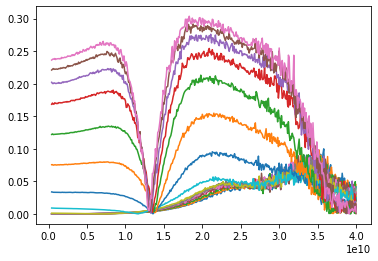

In [75]:
for i in range(17):
    plt.plot(gm_dataframe_array[:,0], gm_dataframe_array[:,(i + 1)])

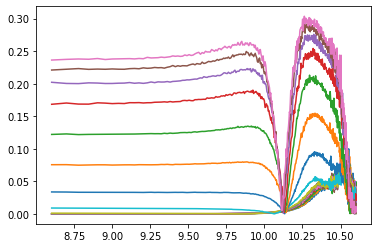

In [76]:
for i in range(17):
    plt.plot(np.log10(gm_dataframe_array[:,0]), gm_dataframe_array[:,(i + 1)])

In [77]:
################################################### cds ########################################################

In [78]:
cds_dataframe = pd.DataFrame(cds_meas_dict)
cds_dataframe.insert(0, 'Frequency', freq)
cds_dataframe_array = np.asarray(cds_dataframe)
cds_dataframe

,Frequency,AC3.s2p,AI2.s2p,AO1.s2p,AT9.s2p,AZ8.s2p,BF7.s2p,BL6.s2p,BR5.s2p,BX4.s2p,CD3.s2p,CJ2.s2p,CP1.s2p,CU9.s2p,DA9.s2p,DG8.s2p,DM6.s2p,DS1.s2p
0,4.000000e+08,4.174500e-13,4.255133e-13,4.281186e-13,4.185820e-13,4.179156e-13,4.165354e-13,4.272938e-13,4.354907e-13,4.353343e-13,4.413781e-13,4.560093e-13,4.448033e-13,4.575226e-13,4.207394e-13,5.148263e-13,5.210876e-13,3.393792e-13
1,5.000000e+08,4.266631e-13,4.228949e-13,4.310007e-13,4.296827e-13,4.288101e-13,4.377718e-13,4.293341e-13,4.301545e-13,4.247923e-13,4.296314e-13,4.406814e-13,4.507307e-13,4.672947e-13,4.546249e-13,4.795051e-13,5.657831e-13,4.684246e-13
2,6.000000e+08,4.204575e-13,4.219312e-13,4.216152e-13,4.246229e-13,4.277945e-13,4.341206e-13,4.268541e-13,4.292081e-13,4.320995e-13,4.320349e-13,4.296237e-13,4.364663e-13,4.519689e-13,4.700838e-13,4.773616e-13,4.679104e-13,5.044418e-13
3,7.000000e+08,4.245209e-13,4.244811e-13,4.230092e-13,4.305212e-13,4.290518e-13,4.277584e-13,4.277470e-13,4.282471e-13,4.284745e-13,4.287675e-13,4.375047e-13,4.596112e-13,4.632470e-13,4.682835e-13,4.502163e-13,4.536814e-13,4.927533e-13
4,8.000000e+08,4.272779e-13,4.244251e-13,4.300673e-13,4.320228e-13,4.250376e-13,4.283848e-13,4.286473e-13,4.315343e-13,4.326096e-13,4.329439e-13,4.393772e-13,4.636706e-13,4.574426e-13,4.618778e-13,4.689585e-13,5.132939e-13,4.722422e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.960000e+10,-8.333717e-13,-7.387026e-13,-9.107327e-13,-7.513736e-13,-8.953677e-13,-7.590019e-13,-8.101213e-13,-9.904926e-13,-9.420191e-13,-8.320601e-13,-8.377634e-13,-9.126762e-13,-8.194502e-13,-7.417353e-13,-8.350147e-13,-7.487418e-13,-8.113192e-13
393,3.970000e+10,-7.095417e-13,-7.742356e-13,-7.302588e-13,-8.647361e-13,-8.646756e-13,-7.633520e-13,-8.580462e-13,-8.363606e-13,-8.002748e-13,-8.733047e-13,-8.500823e-13,-8.119486e-13,-7.339073e-13,-6.480630e-13,-6.729980e-13,-7.685561e-13,-6.984930e-13
394,3.980000e+10,-6.812709e-13,-7.071687e-13,-6.352423e-13,-5.672591e-13,-6.571697e-13,-5.627161e-13,-5.681768e-13,-6.087155e-13,-7.565269e-13,-7.845157e-13,-6.865879e-13,-5.977612e-13,-7.250827e-13,-4.791622e-13,-6.105365e-13,-6.802924e-13,-6.838850e-13
395,3.990000e+10,-7.691406e-13,-8.233347e-13,-6.517864e-13,-6.998107e-13,-6.743868e-13,-8.801105e-13,-7.290087e-13,-8.214379e-13,-7.377926e-13,-7.993843e-13,-7.608815e-13,-9.168688e-13,-7.867460e-13,-8.749475e-13,-9.404755e-13,-7.455857e-13,-6.765067e-13


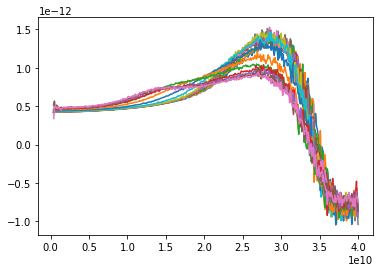

In [79]:
for i in range(17):
    plt.plot(cds_dataframe_array[:,0], cds_dataframe_array[:,(i + 1)])

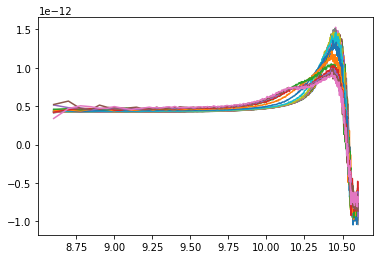

In [80]:
for i in range(17):
    plt.plot(np.log10(cds_dataframe_array[:,0]), cds_dataframe_array[:,(i + 1)])

In [81]:
################################################### rds ########################################################

In [82]:
rds_dataframe = pd.DataFrame(rds_model_dict)
rds_dataframe.insert(0, 'Frequency', freq)
rds_dataframe_array = np.asarray(rds_dataframe)
rds_dataframe

,Frequency,AC3.s2p,AI2.s2p,AO1.s2p,AT9.s2p,AZ8.s2p,BF7.s2p,BL6.s2p,BR5.s2p,BX4.s2p,CD3.s2p,CJ2.s2p,CP1.s2p,CU9.s2p,DA9.s2p,DG8.s2p,DM6.s2p,DS1.s2p
0,4.000000e+08,-174601.538899,-53857.953193,47560.803157,37557.024678,-279869.848044,-150161.514767,68293.226586,1.182112e+05,247601.192905,6787.542403,1647.163589,751.558553,452.245694,362.051387,269.002308,264.121736,234.012541
1,5.000000e+08,219962.903555,138292.630026,54291.544655,293485.240430,45546.769976,66349.734790,-203990.244304,1.619431e+05,35193.541409,6009.359891,1655.258289,713.841199,427.186003,328.819727,285.273912,254.014166,231.173975
2,6.000000e+08,135959.188589,42493.739223,-252265.813730,125350.573965,-186792.402601,-560046.804883,-421913.142665,-2.645980e+06,31328.820184,7425.717006,1783.113432,777.631358,456.114126,356.212518,283.572971,243.829964,229.048295
3,7.000000e+08,155103.529196,66996.603103,70184.808866,235311.631572,260713.342412,281218.362986,-132325.230177,-4.099993e+05,24907.842197,7087.969001,1783.033954,748.802940,453.598237,364.061956,274.256084,254.213597,233.700358
4,8.000000e+08,82627.323154,-416576.515418,44496.032662,45071.347805,63708.998100,75762.426270,63822.059254,4.424415e+04,55969.197441,6543.597908,1676.072352,724.727124,447.408130,325.419659,279.079769,253.844140,223.876994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.960000e+10,3.430951,2.968268,3.424791,3.619256,3.692380,3.425532,3.657604,3.331669e+00,3.582693,4.537581,4.221036,4.226591,3.913413,3.660477,4.454481,4.086602,4.174974
393,3.970000e+10,3.301024,3.134830,3.433770,3.404510,3.331489,3.434185,3.523241,3.546853e+00,3.812198,3.600818,3.575163,3.639674,4.237698,3.846465,4.095522,4.082949,3.945602
394,3.980000e+10,3.782671,4.032668,3.835764,3.593100,3.410193,3.896295,3.440555,3.416559e+00,3.589440,3.574554,3.565933,4.383581,4.102668,3.895909,4.060885,4.361482,4.098945
395,3.990000e+10,3.746203,3.079222,3.434333,3.862780,3.890178,3.963707,3.555071,4.071259e+00,4.050514,4.245901,4.257786,4.034342,4.374646,4.531589,4.538689,3.857606,3.840686


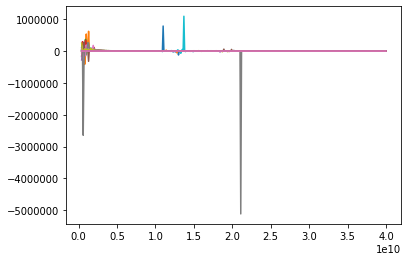

In [83]:
for i in range(17):
    plt.plot(rds_dataframe_array[:,0], rds_dataframe_array[:,(i + 1)])

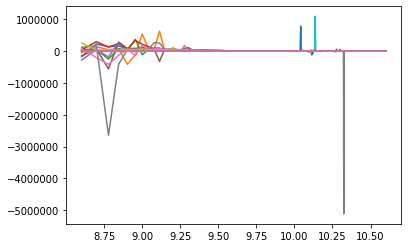

In [84]:
for i in range(17):
    plt.plot(np.log10(rds_dataframe_array[:,0]), rds_dataframe_array[:,(i + 1)])

In [85]:
############################################ plotting points for selected frequency ####################################

In [86]:
freq_list = cgd_dataframe_array[:, 0]
functions_list = ['cgd_meas', 'cgs_meas', 'gm_meas', 'cds_meas', 'rds_model']

In [92]:
from tkinter import *
from tkinter import ttk

root = Tk()
root.title('Select frequency and function values')
root.geometry("700x700")

selected_freq_values = []
selected_function = []


def selected_freq(event):
#     myLabel = Label(root, text=f'vd: {vdCombo.get()}').pack() #.grid(row = 75, column = 50)
    selected_freq_values.append(freqCombo.get())
    
# def selected_func(event):
# #     myLabel = Label(root, text=f'vg: {vgCombo.get()}').pack()#, anchor = "e")#.grid(row = 475, column = 550)
#     selected_function.append(funcCombo.get())


def show(event):    
    selected_function.append(funcCombo.get())
    Label_freq_func = Label(root,text=f'frequency: {freqCombo.get()}, function: {funcCombo.get()}').pack()
    
def close_window (): 
    root.destroy()


freqCombo = ttk.Combobox(root, value= freq_list)
freqCombo.current(0)
freqCombo.bind("<<ComboboxSelected>>", selected_freq)
freqCombo.pack()
freqCombo.place(x = 75, y = 25)


funcCombo = ttk.Combobox(root, value= functions_list)
funcCombo.current(0)
funcCombo.bind("<<ComboboxSelected>>", show)
funcCombo.pack()
funcCombo.place(x = 475, y = 25)


button = ttk.Button(root, text = "close", command = close_window)
button.pack()
button.place(x = 315, y = 500)

    
root.mainloop()

In [93]:
selected_freq_values


['2.00000000e+09', '2.00000000e+09', '2.00000000e+09']

In [94]:
selected_function

['cgd_meas', 'cgs_meas', 'gm_meas']

In [95]:
def get_array(func):
    if func == 'cgd_meas':
        return cgd_dataframe_array
    elif func == 'cgs_meas':
        return cgs_dataframe_array
    elif func == 'gm_meas':
        return gm_dataframe_array
    elif func == 'cds_meas':
        return cds_dataframe_array
    else:
        return rds_dataframe_array
    

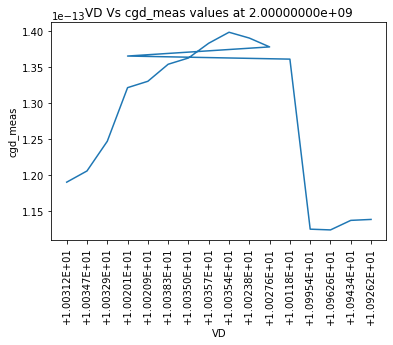

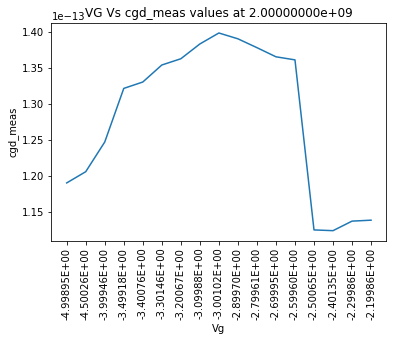

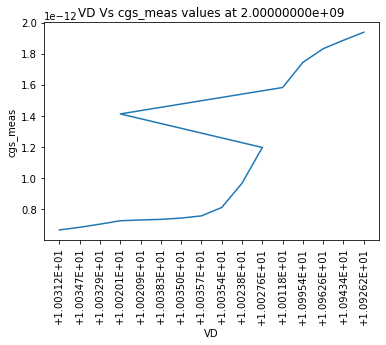

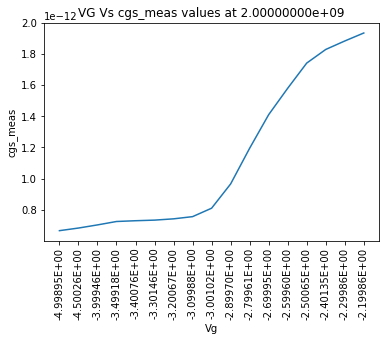

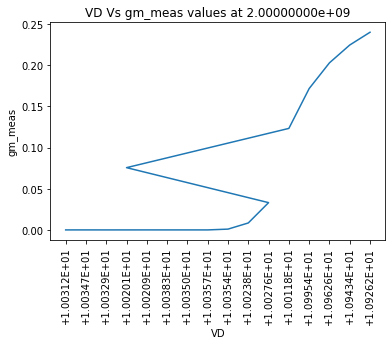

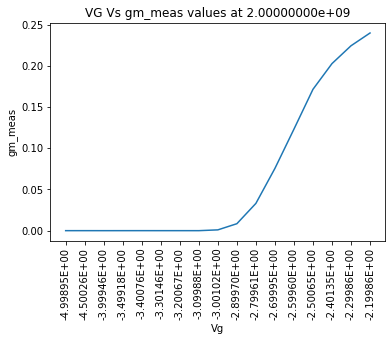

In [97]:
for f, func in zip(selected_freq_values, selected_function):
    func_array = get_array(func)
#     print(func_array[:, 0])
    row = list(func_array[:, 0]).index(np.float(f))
#     plt.title(f'freq: {f}, function: {func}')
    plt.title(f'VD Vs {func} values at {f}')
    plt.plot(vd_values, func_array[row, 1:])
    plt.xticks(rotation=90)
    plt.xlabel('VD')
    plt.ylabel(func)
    plt.show()
    
    plt.title(f'VG Vs {func} values at {f}')
    plt.plot(vg_values, func_array[row, 1:])
    plt.xticks(rotation=90)
    plt.xlabel('Vg')
    plt.ylabel(func)
    plt.show()
    